## Chapter 14: Tree-based learners

# 14.5  Gradient Boosting

Boosting, as described in Section 11.3, is an extremely popular cross-validation technique for building effective tree-based models.  Indeed trees - and most commonly *stumps* - are often the most popular universal approximator used when applying boosting, with this pairing often being referred to as *gradient boosting*.   The use of stumps in particular - with their low capacity and simple behavior - enables a high resolution search for the right capacity model (as discussed in Section 11.3.2).

In [8]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import autograd.numpy as np
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'
 
# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
%matplotlib notebook

# plotting
import matplotlib.pyplot as plt
import copy

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Below we illustrate the use of boosting with regression stumps which is often - as discussed in Section 11.3.5 - interpreted as successive rounds of 'fitting to the residual' of a regression dataset.  In the left panel we show the original dataset along with the result fit provided by a model constructed from multiple rounds of stump-based boosting.  Simultaneusly in the right panel we show each subsequent stump-based fit to the residual provided by the previous model to the regression data.


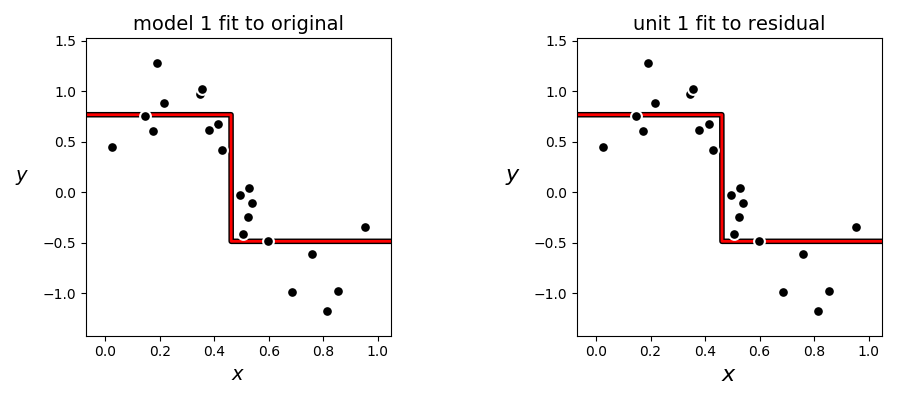
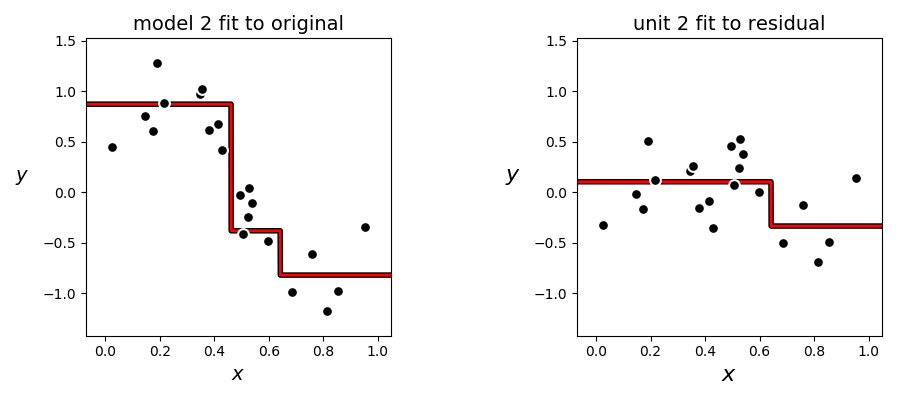
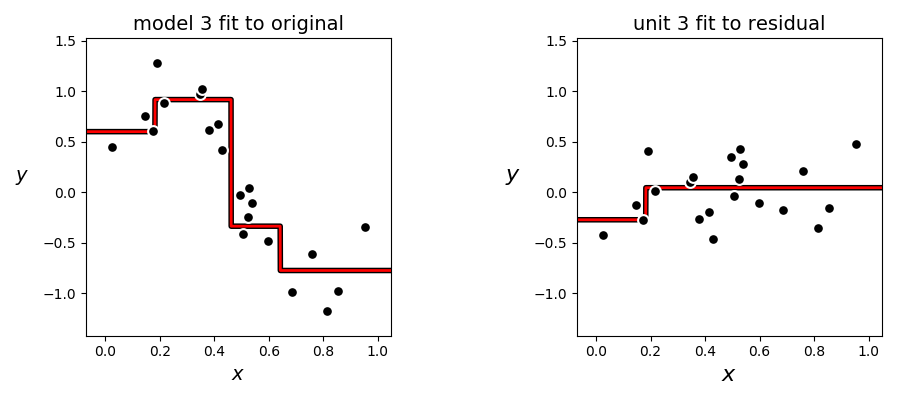
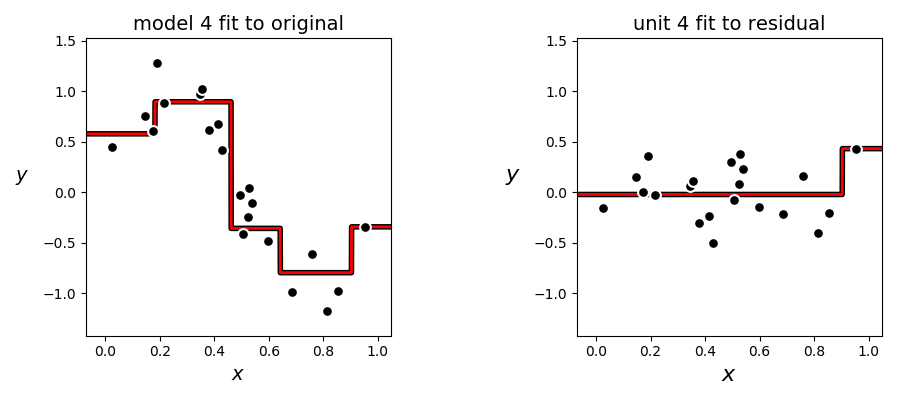
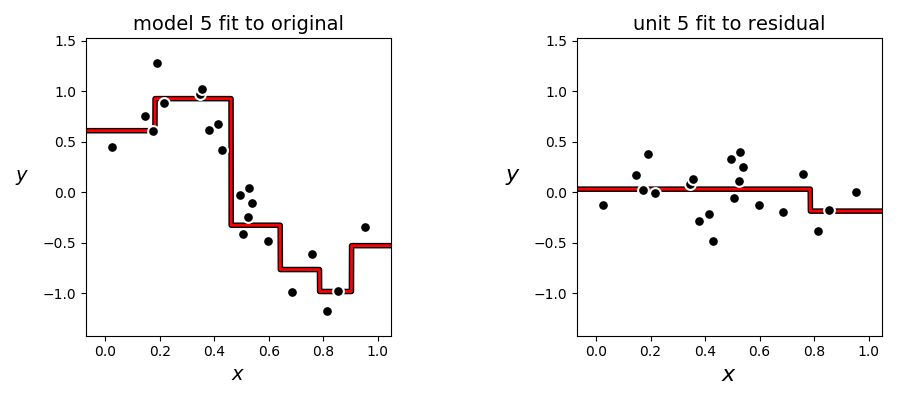
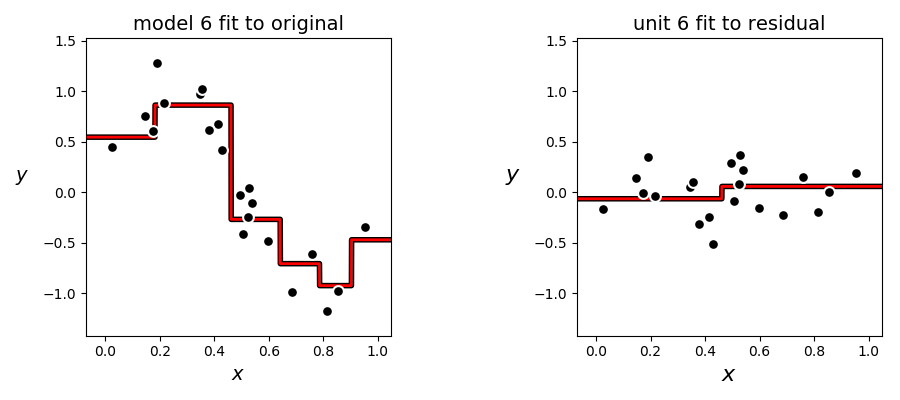
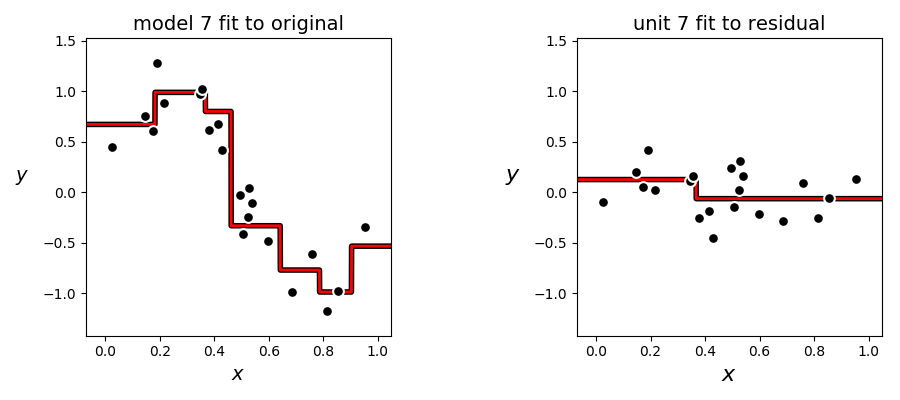
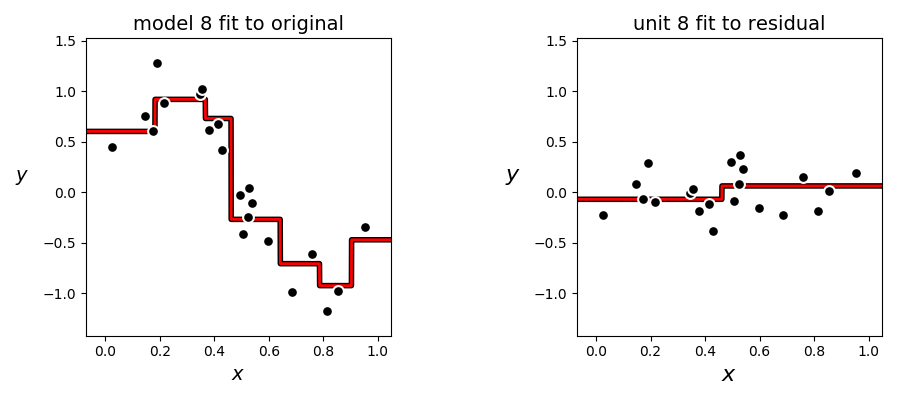
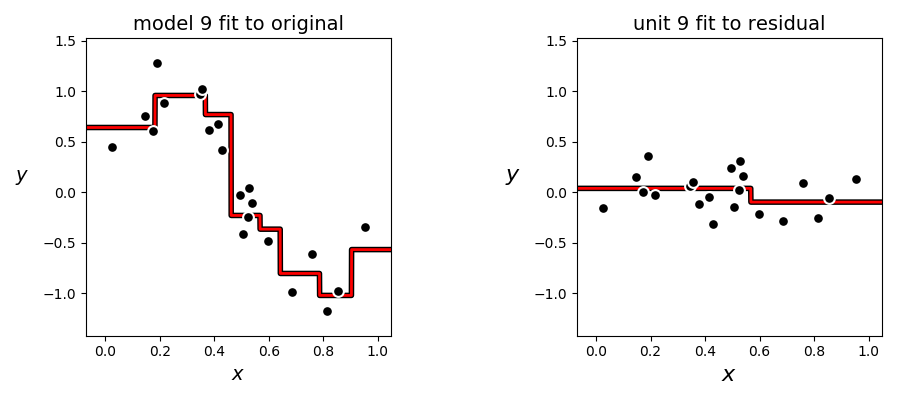
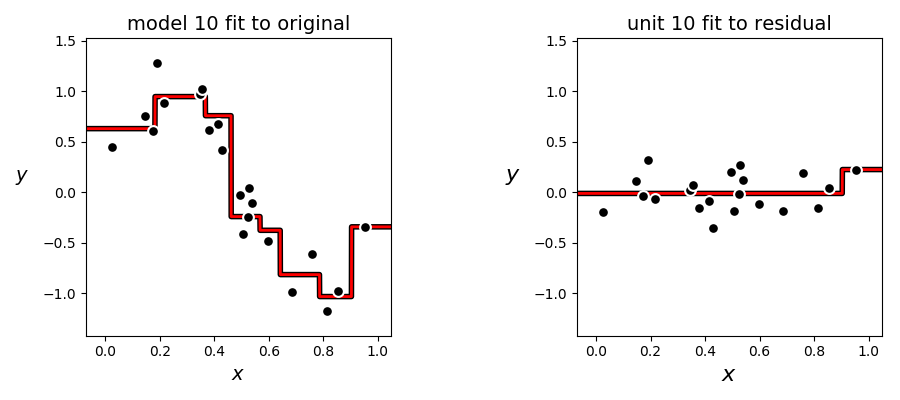
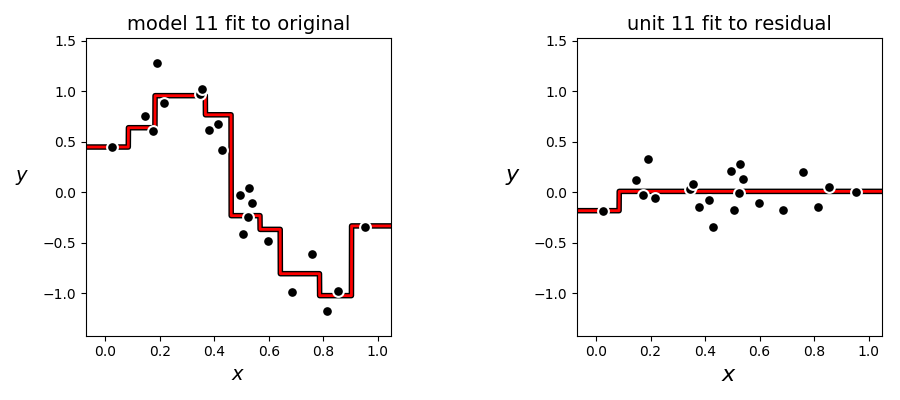
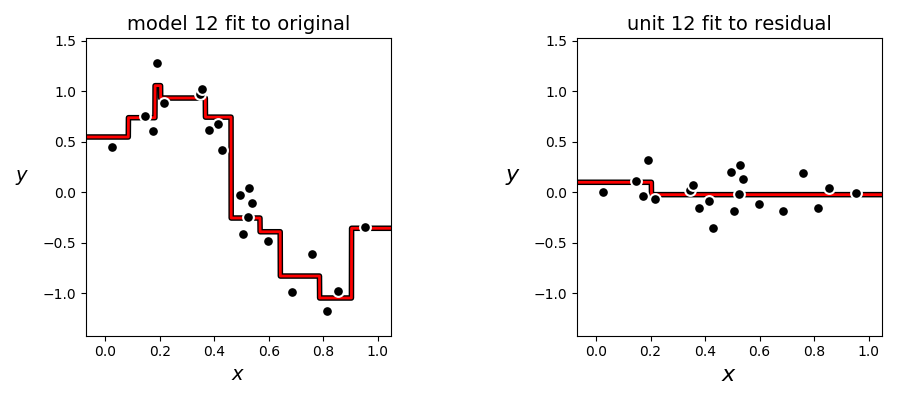
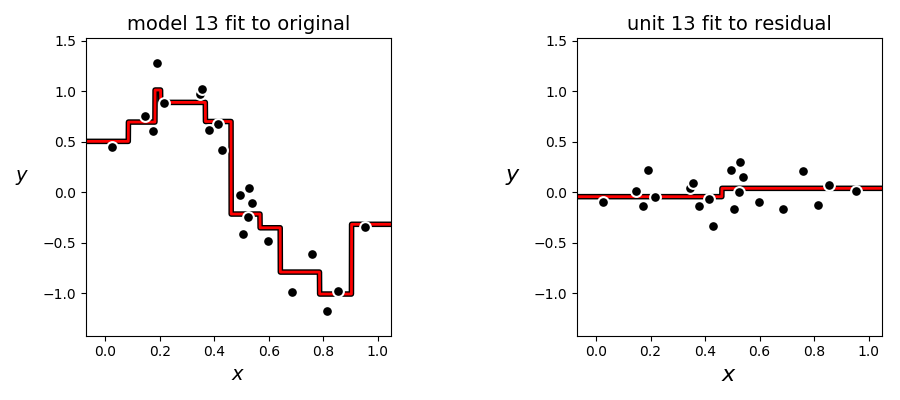
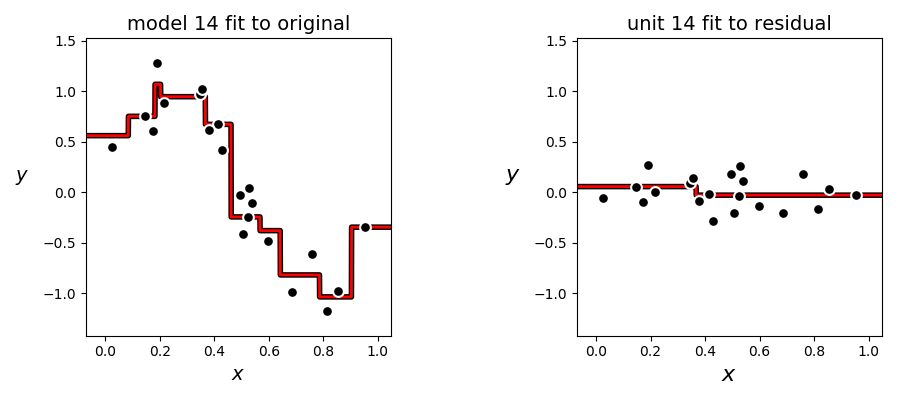
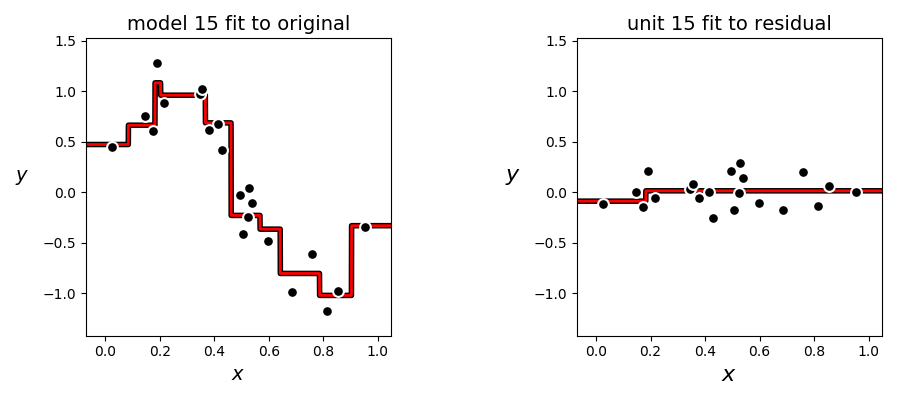
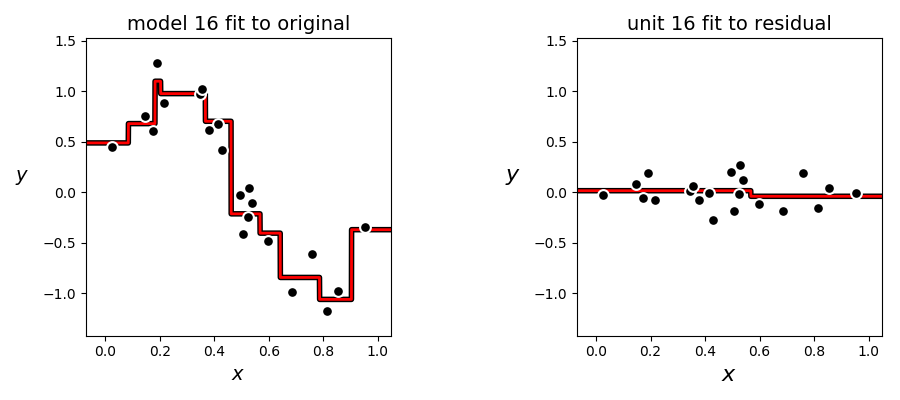
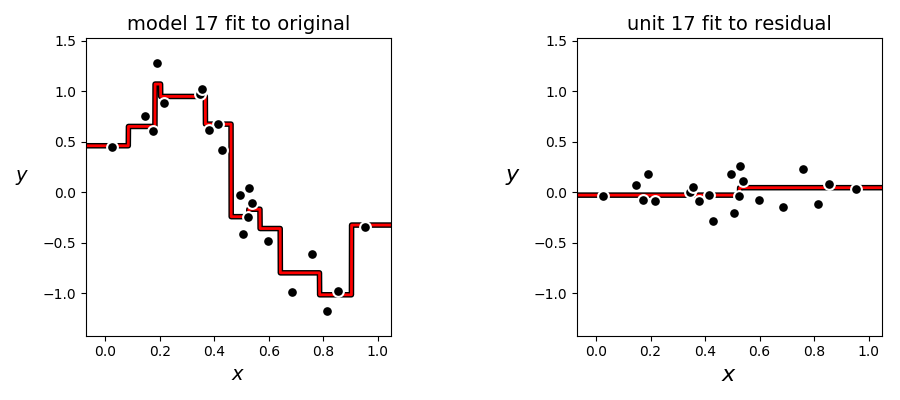
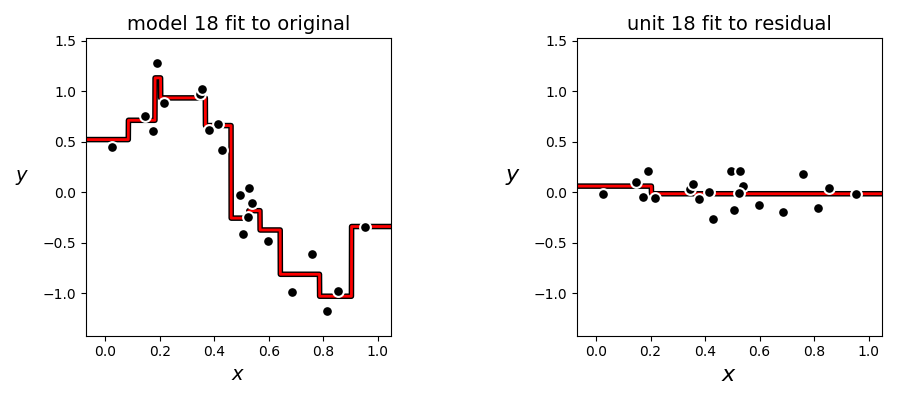
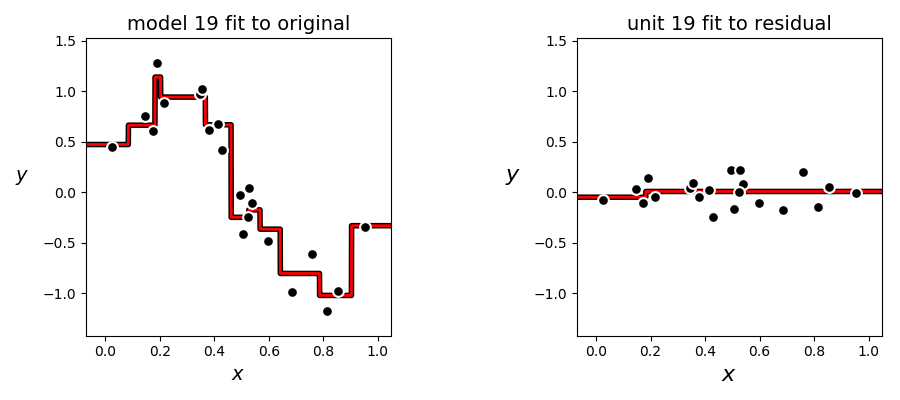
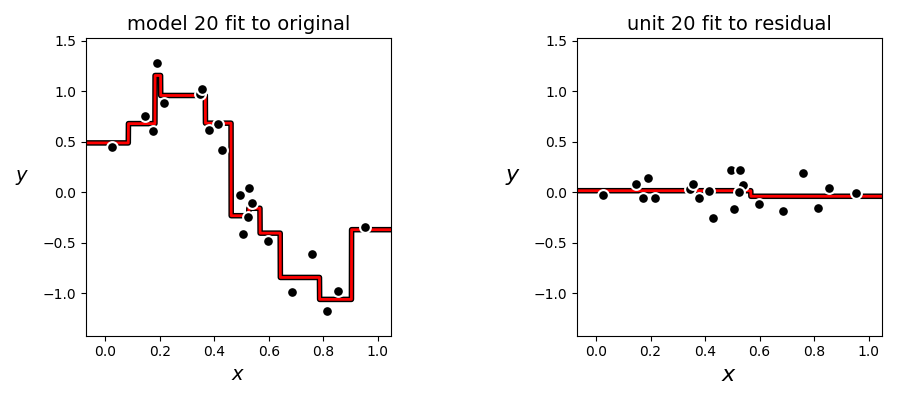
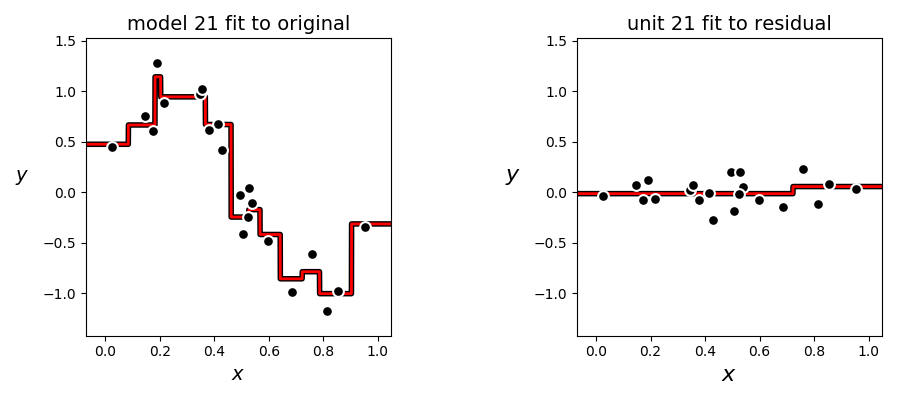
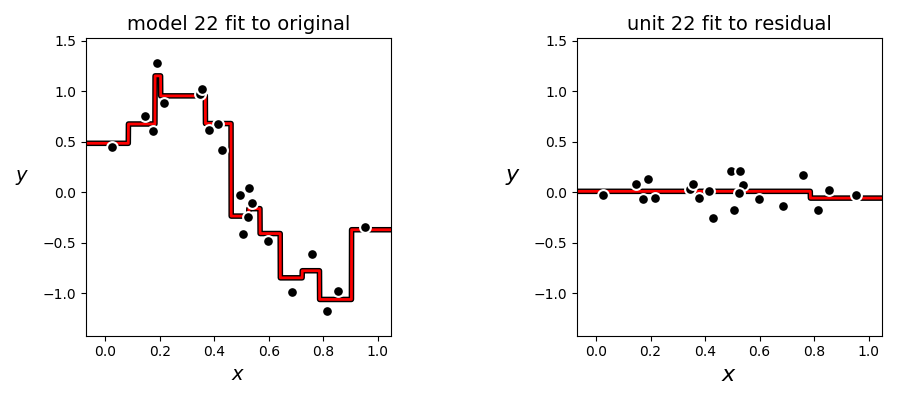
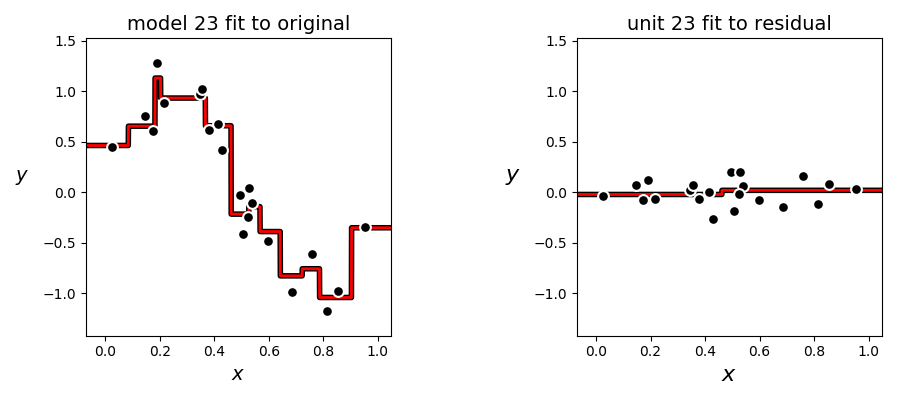
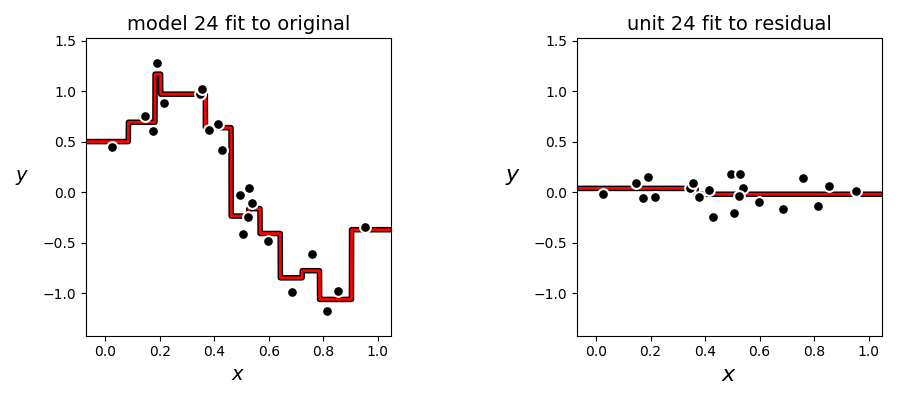
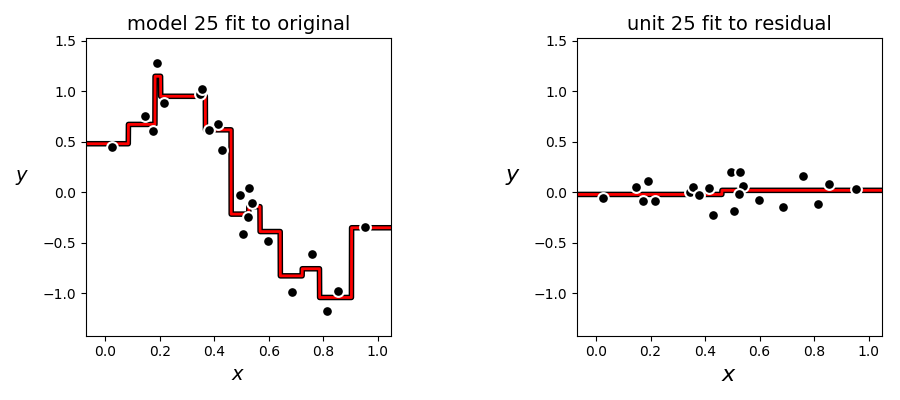
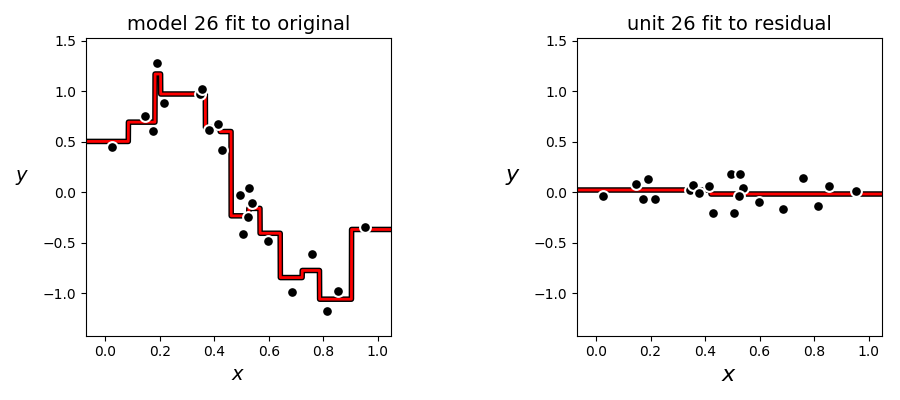
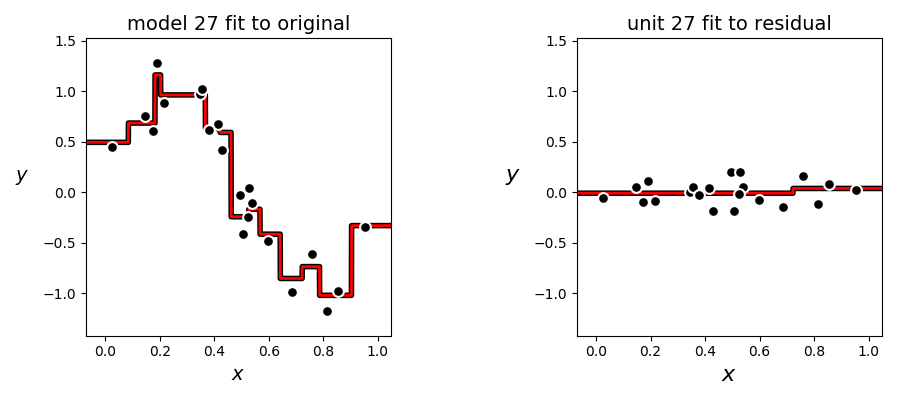
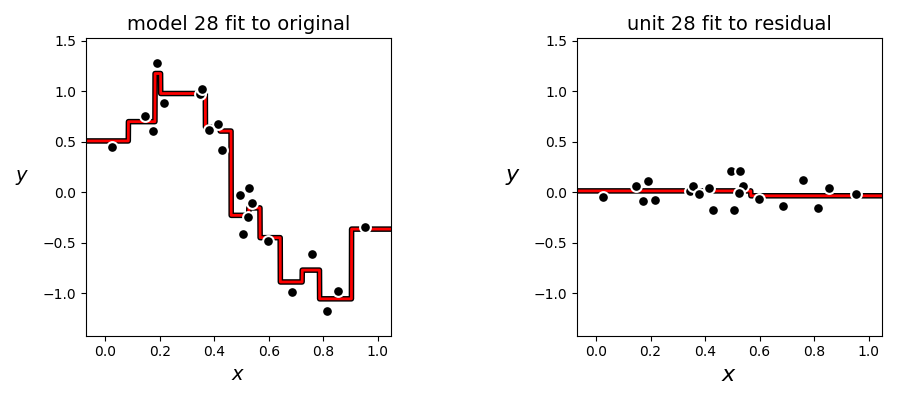
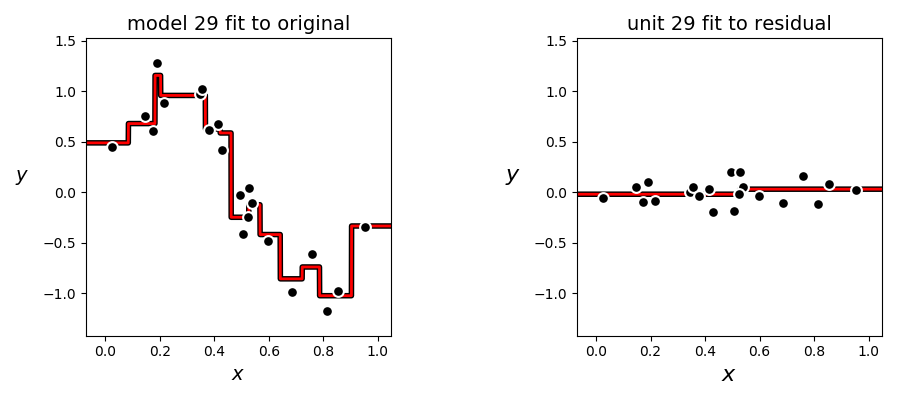
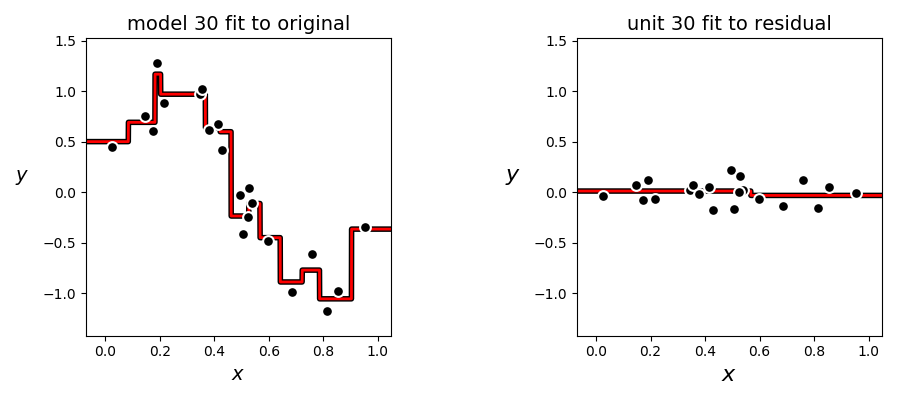
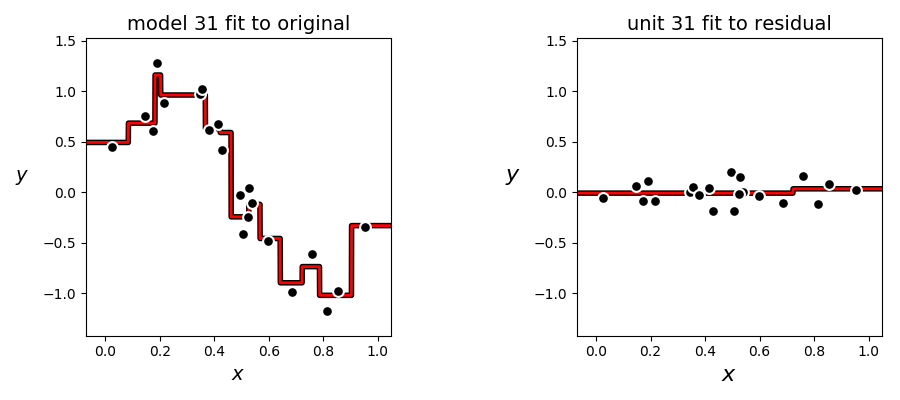
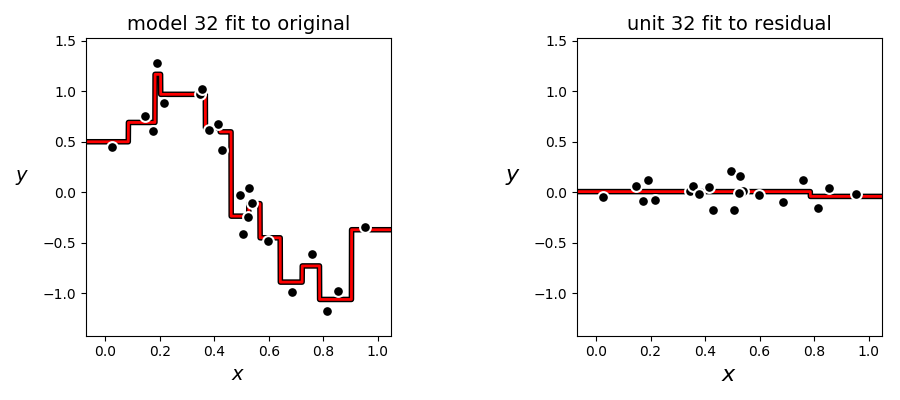
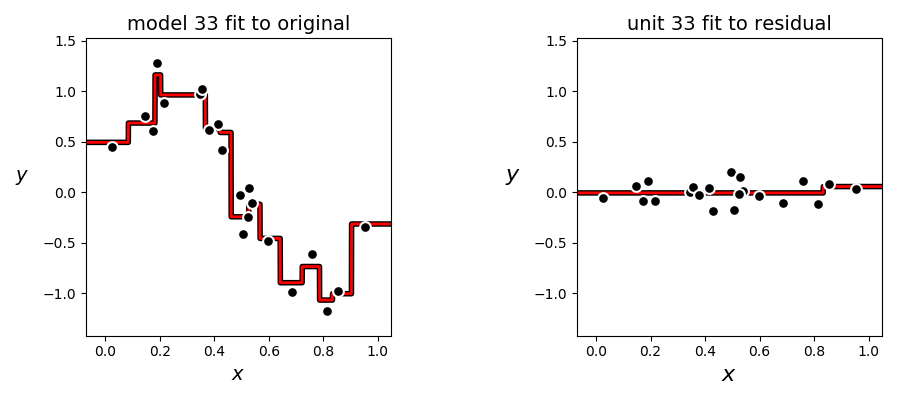
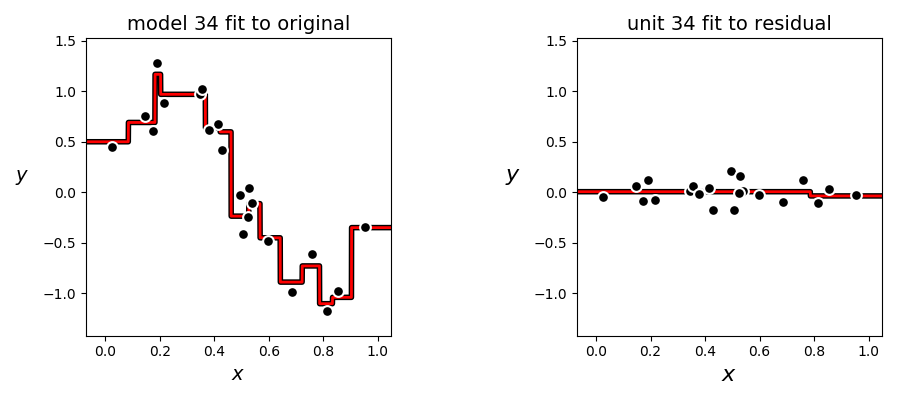
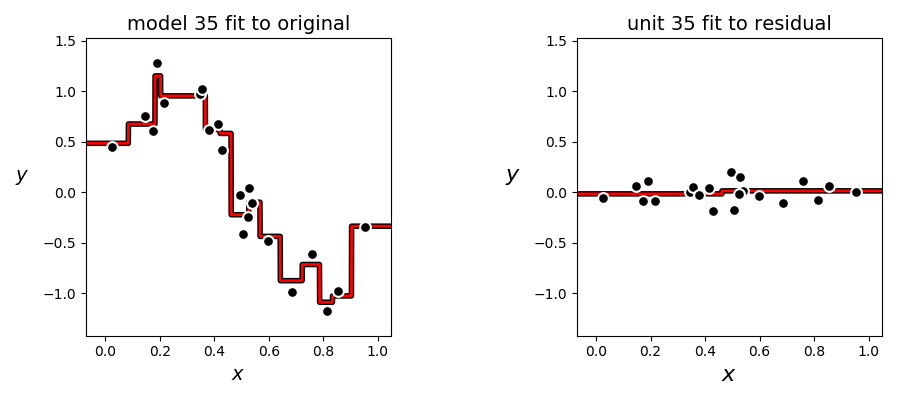
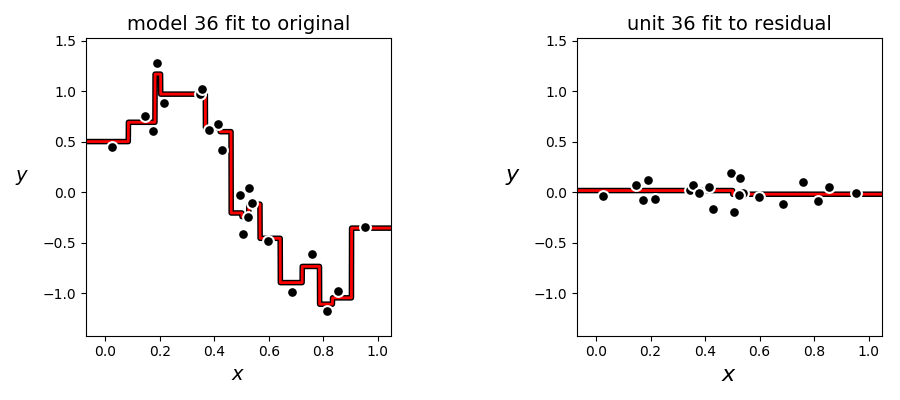
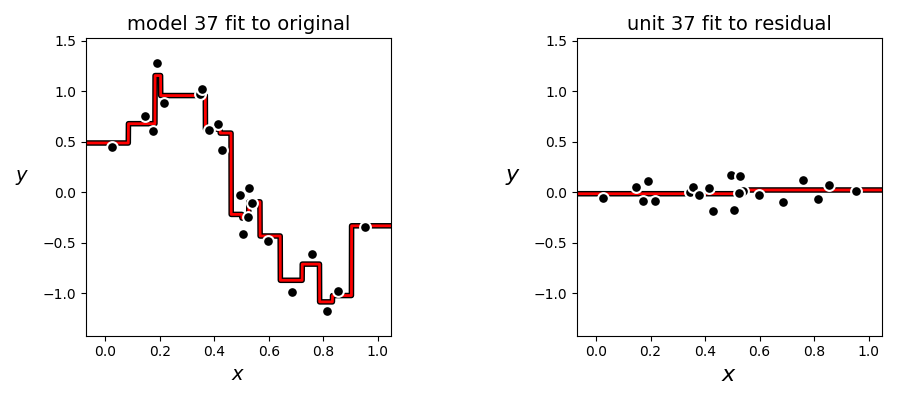
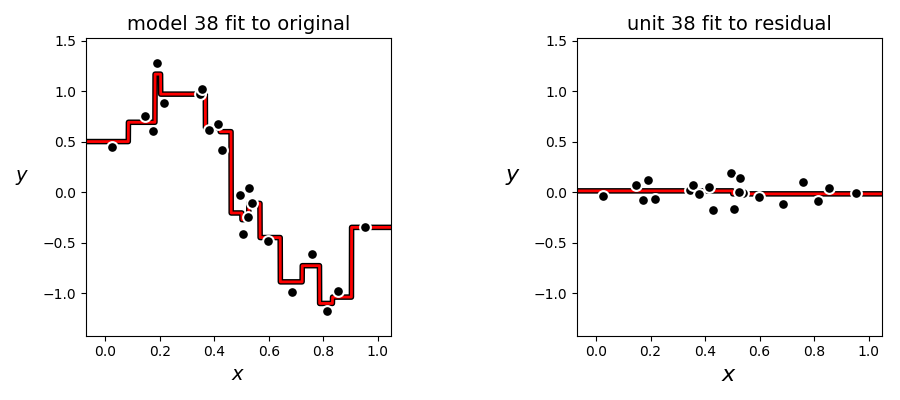
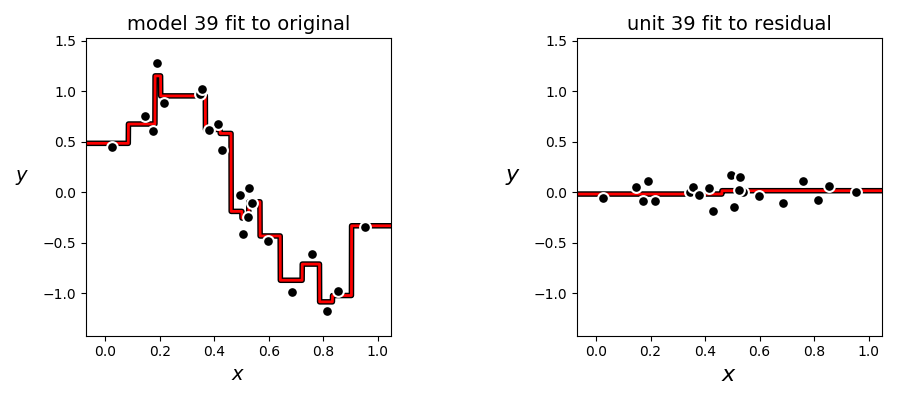
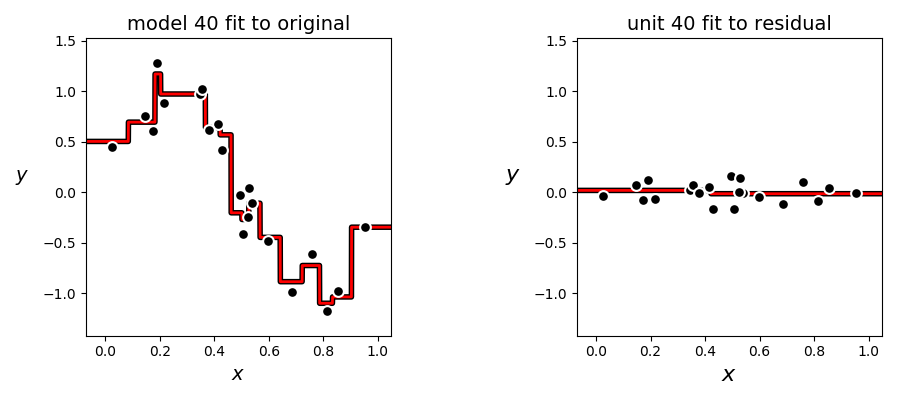

In [24]:
## This code cell will not be shown in the HTML version of this notebook
# load in dataset
csvname = datapath + 'universal_regression_samples_0.csv'
csvname = datapath + 'noisy_sin_sample.csv'

data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:] )

# boosting procedure
num_units = 40
runs2 = []
for j in range(num_units):    
    # import the v1 library
    mylib2 = nonlib.boost_lib3.stump_booster.Setup(x,y)
    
    # choose normalizer
    mylib2.choose_normalizer(name = 'standard')

    # choose normalizer
    mylib2.make_train_valid_split(train_portion = 1)

    # choose cost|
    mylib2.choose_cost(name = 'least_squares')

    # choose optimizer
    mylib2.choose_optimizer('newtons_method',max_its=1)
    
    # run boosting
    mylib2.boost(1,verbose=False)
    mylib2.model = mylib2.models[-1]

    # add model to list
    runs2.append(copy.deepcopy(mylib2))
    
    # cut off output given model
    normalizer = mylib2.normalizer
    ind = np.argmin(mylib2.train_cost_vals[0])
    y_pred =  mylib2.models[-1](mylib2.normalizer(x))
    y -= y_pred

# animate the business
frames = num_units
demo2 = nonlib.boosting_regression_animators_v3.Visualizer(csvname)
demo2.animate_boosting(runs2,frames)